In [1]:
import omnitool
from omnitool.literature_values import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
'''We want to go from a series of apparent magnitudes & positions
to values of absolute magnitudes.

For this, we'll use the Elsworth et al. 2017 sample applied in the
Davies et al. 2017 work.

This array has a lot of data so for clarity I'm only going to read in
the ones we need.
'''
columns = ['KIC','astero_parallax','astero_parallax_err','GLAT','GLON',\
           'kic_kmag','kic_jmag','kic_hmag']

e17 = pd.read_csv('/home/oliver/PhD/Catalogues/RC_catalogues/Elsworth_x_TGAS.csv',\
                 usecols=columns)
print(e17.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 885
Data columns (total 8 columns):
KIC                    886 non-null int64
astero_parallax        886 non-null float64
astero_parallax_err    886 non-null float64
GLAT                   886 non-null float64
GLON                   886 non-null float64
kic_jmag               886 non-null float64
kic_hmag               886 non-null float64
kic_kmag               886 non-null float64
dtypes: float64(7), int64(1)
memory usage: 62.3 KB
None


In [9]:
'''Lets call in the Spyglass class and pass all the object IDs'''
sg = omnitool.spyglass(str(e17.KIC))

In [12]:
'''Now lets pass it the position and band magnitudes'''
sg.pass_parallax(e17.astero_parallax, err=e17.astero_parallax_err)
sg.pass_position(e17.GLON, e17.GLAT, frame='galactic')
#Note the use of galactic frame here as my position is in galactic
#longititude and latitude.
sg.pass_magnitude(e17.kic_kmag,err=None,band='Ks')

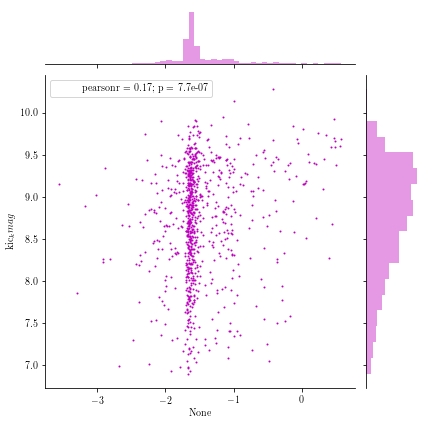

Median value: -1.6146549684956883


In [19]:
'''Now lets call for the absolute magnitude and magnitude error'''
MKs, MKs_err = sg.get_M()

sns.jointplot(MKs, e17.kic_kmag, color='m',s=1)
plt.show()
print('Median value: '+str(np.median(MKs)))

In [22]:
'''Now lets say we want to do the same but for H and J bands'''
sg.pass_magnitude(e17.kic_jmag,err=None,band='J')
MJ, MJ_err = sg.get_M()

sg.pass_magnitude(e17.kic_hmag,err=None,band='H')
MH, MH_err = sg.get_M()

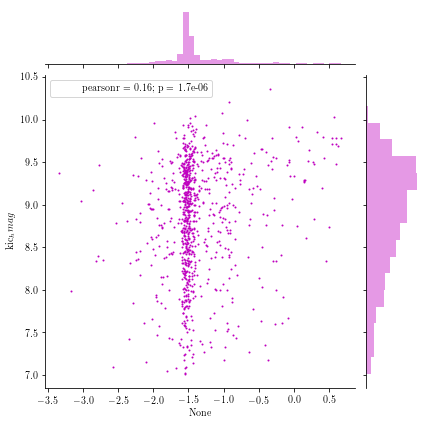

Median value: -1.4980597252127295


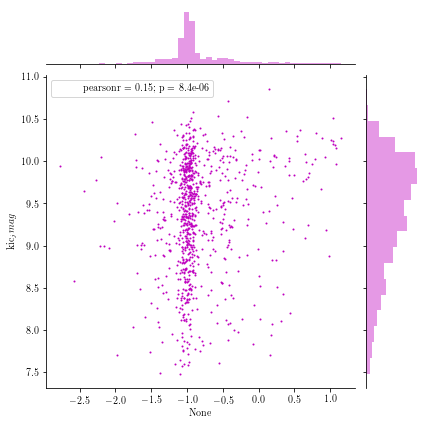

Median value: -0.9673278481686458


In [26]:
sns.jointplot(MH, e17.kic_hmag, color='m',s=1)
plt.show()
print('Median value: '+str(np.median(MH)))

sns.jointplot(MJ, e17.kic_jmag, color='m',s=1)
plt.show()
print('Median value: '+str(np.median(MJ)))

Text(0,0.5,u'm$_{Ks}$')

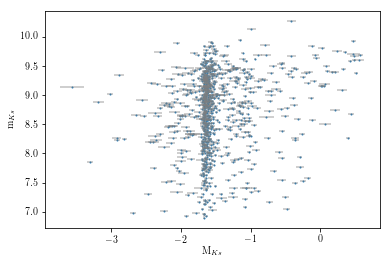

In [29]:
'''Finally, lets plot the above with errors for Ks for illustration.'''
fig, ax = plt.subplots()
ax.scatter(MKs, e17.kic_kmag,s=1)
ax.errorbar(MKs, e17.kic_kmag, xerr=MKs_err,alpha=.5,fmt='none',c='grey')
ax.set_xlabel(r'M$_{Ks}$')
ax.set_ylabel(r'm$_{Ks}$')

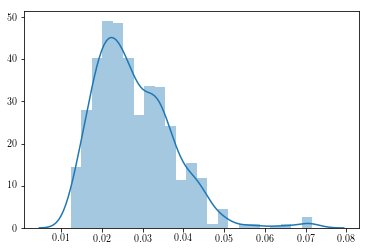

In [32]:
'''If you want, make a quick test that the Av collection from the
Bayestar 2017 database is working...'''
Av = sg.get_Av()
sns.distplot(Av)
plt.show()